In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import geopandas as gpd
import geoplot.crs as gcrs
import geoplot as gplt

In [3]:
# Load the main data frame
df = pd.read_csv('/Users/wooyongjung/WJ_Projects/HomelessStudy_SanFrancisco_2024/data/df_sf_20240911.csv')

In [4]:
df.head()

,image_id,user_id,sequence_id,image_coord,image_timestamp_unix,image_url,image_angle,chunk_id,image_timestamp,year,month,geoid,bboxid,num_tents,confidence,day,hour,GEOID,geometry
0,327669609883423,105986451641170,tpibOxJS5TYZ8V4crsIX9n,"[-122.49810039997101, 37.708604958036545]",1699723630093,https://scontent-iad3-2.xx.fbcdn.net/m1/v/t6/A...,4.955116,chunk_0,2023-11-11 17:27:10.093,2023,11,60750604002,bbox_2_7,NaN,NaN,11,17,60750604002,"POLYGON ((-122.512733380415 37.73508797666425,..."
1,303401841368941,102905365286641,14jeyr2dygbpaexrxv7bqb,"[-122.49807357788086, 37.708991157486594]",1495412840007,https://scontent-iad3-2.xx.fbcdn.net/m1/v/t6/A...,7.626879,chunk_0,2017-05-22 00:27:20.007,2017,5,60750604002,bbox_2_7,0.0,(),22,0,60750604002,"POLYGON ((-122.512733380415 37.73508797666425,..."
2,329903498499807,104408981801642,v66wj3bf8pakks2pq1ws47,"[-122.49806821346283, 37.70853281066343]",1545518762168,https://scontent-iad3-2.xx.fbcdn.net/m1/v/t6/A...,5.560757,chunk_0,2018-12-22 22:46:02.168,2018,12,60750604002,bbox_2_7,0.0,(),22,22,60750604002,"POLYGON ((-122.512733380415 37.73508797666425,..."
3,274600944394813,104408981801642,52l7p54xlo9r92li3feskq,"[-122.4981701374054, 37.708961449908045]",1531338525997,https://scontent-iad3-2.xx.fbcdn.net/m1/v/t6/A...,183.032623,chunk_0,2018-07-11 19:48:45.997,2018,7,60750604002,bbox_2_7,0.0,(),11,19,60750604002,"POLYGON ((-122.512733380415 37.73508797666425,..."
4,519584729064799,104408981801642,d85uqp4g9lwq0vzt32vao1,"[-122.49844908714294, 37.70762884056478]",1531702119180,https://scontent-iad3-2.xx.fbcdn.net/m1/v/t6/A...,185.561066,chunk_0,2018-07-16 00:48:39.180,2018,7,60750604002,bbox_2_7,0.0,(),16,0,60750604002,"POLYGON ((-122.512733380415 37.73508797666425,..."


In [138]:
df['geometry'][0]

'POLYGON ((-122.512733380415 37.73508797666425, -122.5100843855766 37.73513197063848, -122.5085393883139 37.7354029652381, -122.5067973915658 37.73555996028199, -122.5066713918059 37.73556695995683, -122.5065223920923 37.73557295958983, -122.5061363928527 37.73557195876654, -122.5053813943435 37.73556695717973, -122.5052633945767 37.73556595693343, -122.5051543947911 37.73556595669878, -122.5041863967031 37.73555895466901, -122.5032203986111 37.7355519526437, -122.5031113988245 37.73555295240132, -122.5029963990473 37.73555595213054, -122.5025593999048 37.73555795117432, -122.5020324009881 37.73551595036557, -122.5015964019314 37.73543895002472, -122.5011804028564 37.73534294987516, -122.5010424031745 37.7353009499046, -122.5009034035001 37.73525394997085, -122.5004944044692 37.73510595024209, -122.5000644055372 37.73490595087404, -122.4992404044185 37.73445495541196, -122.4991404042448 37.73440495595206, -122.4990344040517 37.73435995646221, -122.4986074032642 37.73418695844911, -122.

In [137]:
df.shape

(1852845, 19)

In [11]:
# Add 0 to the beginning of GEOID
df['geoid'] = df['geoid'].astype(str)
df['geoid'] = df['geoid'].apply(lambda x: x.zfill(12))

# Drop GEOID
df = df.drop(columns=['GEOID'])

# Sort the data frame
df = df.sort_values(by=['bboxid', 'user_id', 'sequence_id', 'image_timestamp'])

# Reset index
df = df.reset_index(drop=True)

# Make sure 'image_timestamp' is in datetime format
df['image_timestamp'] = pd.to_datetime(df['image_timestamp_unix'], unit='ms')

In [12]:
df.shape

(1852845, 18)

In [13]:
df.head()

,image_id,user_id,sequence_id,image_coord,image_timestamp_unix,image_url,image_angle,chunk_id,image_timestamp,year,month,geoid,bboxid,num_tents,confidence,day,hour,geometry
0,298146495138429,100526525525168,6vYFOoIaA8dE7CMaYn1Nmg,"[-122.48504877090454, 37.71919288439946]",1439563535348,https://scontent-iad3-2.xx.fbcdn.net/m1/v/t6/A...,0.633789,chunk_8,2015-08-14 14:45:35.348,2015,8,060750604002,bbox_10_14,0.0,(),14,14,"POLYGON ((-122.512733380415 37.73508797666425,..."
1,891122931810788,100526525525168,6vYFOoIaA8dE7CMaYn1Nmg,"[-122.48504877090454, 37.71948991862972]",1439563537347,https://scontent-iad3-2.xx.fbcdn.net/m1/v/t6/A...,1.325195,chunk_8,2015-08-14 14:45:37.347,2015,8,060750604002,bbox_10_14,0.0,(),14,14,"POLYGON ((-122.512733380415 37.73508797666425,..."
2,1099326470576763,100526525525168,6vYFOoIaA8dE7CMaYn1Nmg,"[-122.48505413532257, 37.71990152123725]",1439563539343,https://scontent-iad3-2.xx.fbcdn.net/m1/v/t6/A...,2.151306,chunk_8,2015-08-14 14:45:39.343,2015,8,060750604002,bbox_10_14,0.0,(),14,14,"POLYGON ((-122.512733380415 37.73508797666425,..."
3,150559433609175,100526525525168,6vYFOoIaA8dE7CMaYn1Nmg,"[-122.48505413532257, 37.72004579377487]",1439563541356,https://scontent-iad3-2.xx.fbcdn.net/m1/v/t6/A...,2.729370,chunk_8,2015-08-14 14:45:41.356,2015,8,060750604002,bbox_10_14,0.0,(),14,14,"POLYGON ((-122.512733380415 37.73508797666425,..."
4,158821916084439,100526525525168,6vYFOoIaA8dE7CMaYn1Nmg,"[-122.4850594997406, 37.720321608138306]",1439563543342,https://scontent-iad3-2.xx.fbcdn.net/m1/v/t6/A...,358.439200,chunk_8,2015-08-14 14:45:43.342,2015,8,060750604002,bbox_10_14,0.0,(),14,14,"POLYGON ((-122.512733380415 37.73508797666425,..."


In [14]:
# Load the ground truth data
# Extract image_id info from the 'img_secondary_classifer' folder
joined_files = os.path.join("/Users/wooyongjung/WJ_Projects/HomelessStudy_SanFrancisco_2024/data/img_secondary_classifier/test/yes", "*.jpg")
test_list = glob.glob(joined_files)
joined_files = os.path.join("/Users/wooyongjung/WJ_Projects/HomelessStudy_SanFrancisco_2024/data/img_secondary_classifier/train_and_valid/train/yes", "*.jpg")
train_list = glob.glob(joined_files)
joined_files = os.path.join("/Users/wooyongjung/WJ_Projects/HomelessStudy_SanFrancisco_2024/data/img_secondary_classifier/train_and_valid/val/yes", "*.jpg")
val_list = glob.glob(joined_files)
yes_list = test_list + train_list + val_list

# Extract only the image_id part from the yes_list and no_list
import re
yes_list = [re.search(r"img_\d+", x).group() for x in yes_list]

# Extract only the number from the image_id
yes_list = [re.search(r"\d+", x).group() for x in yes_list]

In [16]:
# Create a ground truth data frame
df_gt = pd.DataFrame({'image_id': yes_list, 'ground_truth': 1})

# Drop duplicates
df_gt = df_gt.drop_duplicates(subset=['image_id'], keep='first')

# Convert dtype of image_id to string
df['image_id'] = df['image_id'].astype(str)

# Merge the ground truth data frame to the main data frame
df = pd.merge(df, df_gt, on='image_id', how='left')

# Fill NaN values with 0
df['ground_truth'] = df['ground_truth'].fillna(0)

In [17]:
df.shape

(1852845, 19)

In [18]:
df['ground_truth'].value_counts()

ground_truth
0.0    1852458
1.0        387
Name: count, dtype: int64

### Address overlapping tents in terms of spatial and temporal aspects

In [19]:
# Temporal aspect of the data
# Create a new column 'time_diff'
df_bbox = df.copy()
df_bbox['time_diff'] = df_bbox.groupby(['bboxid', 'sequence_id', str('ground_truth')], as_index=False)['image_timestamp'].diff()

# Fill NaT values with Inf
df_bbox['time_diff'] = df_bbox['time_diff'].fillna(pd.Timedelta(seconds=1e9))

In [20]:
# Remove the overlapping images taken within 10 seconds in the same bboxid, sequence_id, and num_tents
df_bbox = df_bbox[df_bbox['time_diff'] > pd.Timedelta(seconds=10)]

In [21]:
# Sort the data frame
df_bbox = df_bbox.sort_values(by=['bboxid', 'user_id', 'sequence_id', 'image_timestamp'])

# Reset index
df_bbox = df_bbox.reset_index(drop=True)

ground_truth
0.0    101402
1.0       180
Name: count, dtype: int64

In [22]:
# Spatial aspect of the data
from geopy.distance import great_circle

def remove_overlapping_images(df, diameter):
    """
    Removes the overlapping images taken within a certain diameter.

    Parameters:
    - df: pandas DataFrame with 'latitude' and 'longitude' columns
    - diameter: the diameter (in meters) within which points are considered overlapping

    Returns:
    - Filtered DataFrame with non-overlapping points
    """

    # Create a new DataFrame to store non-overlapping points
    filtered_points = []

    for index, row in df.iterrows():
        point = (row['latitude'], row['longitude'])
        # Check if the point is within the specified diameter of any previously added point

        if not any(great_circle(point, (p['latitude'], p['longitude'])).meters <= diameter for p in filtered_points):
            filtered_points.append(row)
        
    return pd.DataFrame(filtered_points)

In [23]:
# Create latitude and longitude columns
df_bbox['latitude'] = df_bbox['image_coord'].apply(lambda x: str(x.split(', ')[1]))
df_bbox['longitude'] = df_bbox['image_coord'].apply(lambda x: str(x.split(', ')[0]))

df_bbox['latitude'] = df_bbox['latitude'].apply(lambda x: float(re.search(r'\d+.\d+', x).group()))
df_bbox['longitude'] = df_bbox['longitude'].apply(lambda x: float(re.search(r'\-\d+.\d+', x).group()))

In [25]:
# Load bbox coordinates
bbox_coord = pd.read_csv('data/df_bbox_99.csv')

# Select the rows with GEOID starting with 06075 (San Francisci County)
bbox_coord['GEOID'] = bbox_coord['GEOID'].astype(str)

# Add 0 to the beginning of GEOID
bbox_coord['GEOID'] = bbox_coord['GEOID'].apply(lambda x: x.zfill(12))
bbox_coord = bbox_coord[bbox_coord['GEOID'].str.startswith('06075')]

# Reset index
bbox_coord.reset_index(inplace=True, drop=True)

# Drop the first column Unnamed: 0
bbox_coord = bbox_coord.drop(['Unnamed: 0'], axis=1)

# Create bboxid column
bbox_coord['bboxid'] = 'bbox_' + bbox_coord.row_num.astype(str) + '_' + bbox_coord.col_num.astype(str)

# Merge the main data frame with the bbox data frame
df_bbox = pd.merge(df_bbox, bbox_coord[['bboxid','swne_edges','center_latlon']], on='bboxid', how='left')

# Create coordinates
df_bbox['swne_edges'] = df_bbox['swne_edges'].apply(lambda x: x[1:-1].split(','))

coords = []
for i in range(len(df_bbox)):
    coord = [(df_bbox['swne_edges'][i][1], df_bbox['swne_edges'][i][0]),
             (df_bbox['swne_edges'][i][3], df_bbox['swne_edges'][i][0]),
             (df_bbox['swne_edges'][i][3], df_bbox['swne_edges'][i][2]),
             (df_bbox['swne_edges'][i][1], df_bbox['swne_edges'][i][2])]
    coords.append(coord)

df_bbox['coords'] = coords

In [26]:
from shapely.geometry import Polygon, LineString, Point, MultiPolygon
# Create a new GeoDataFrame based on coords
# Apply Polygon to coords
df_geo_bbox = df_bbox.copy()
df_geo_bbox['geometry_bbox'] = df_geo_bbox['coords'].apply(Polygon)

# Create a new GeoDataFrame based on coords
df_geo_bbox = gpd.GeoDataFrame(df_geo_bbox, geometry=df_geo_bbox['geometry_bbox'], crs=4326)

In [27]:
# Create a new column 'quarter'
def quarter(row):
    if row['month'] <= 3:
        return 'Q1'
    elif row['month'] <= 6:
        return 'Q2'
    elif row['month'] <= 9:
        return 'Q3'
    else:
        return 'Q4'
    
df_geo_bbox['quarter'] = df_geo_bbox.apply(quarter, axis=1)

In [28]:
# Filter the data frame based on the year (2016-2023)
df_eda = df_geo_bbox[df_geo_bbox['image_timestamp'].dt.year.isin(range(2016, 2024))]

In [31]:
# # Save the data frame
# df_eda.to_csv('data/df_eda.csv', index=False)

In [30]:
df_eda['ground_truth'].value_counts()

ground_truth
0.0    93578
1.0      177
Name: count, dtype: int64

### Merge 311 Dataset

In [60]:
# Load the 311 data
df_311 = pd.read_csv('data/df_311_homeless_sf.csv')

# Convert the 'Opened' column to datetime
df_311['Opened'] = pd.to_datetime(df_311['Opened'])

# Filter the data frame based on the year (2016-2023)
df_311 = df_311[df_311['Opened'].dt.year.isin(range(2016, 2024))]

## Create Year, Month, and Day columns
df_311['Year'] = df_311['Opened'].dt.year
df_311['Month'] = df_311['Opened'].dt.month
df_311['Day'] = df_311['Opened'].dt.day

# Remove Nan values in the 'Point' column
df_311 = df_311[df_311['Point']!= '(0.0, 0.0)']

# Create latitude and longitude columns
df_311['latitude'] = df_311['Point'].apply(lambda x: str(x.split(', ')[0]))
df_311['longitude'] = df_311['Point'].apply(lambda x: str(x.split(', ')[1]))
df_311['latitude'] = df_311['latitude'].apply(lambda x: float(re.search(r'\d+.\d+', x).group()))
df_311['longitude'] = df_311['longitude'].apply(lambda x: float(re.search(r'\-\d+.\d+', x).group()))

/var/folders/y6/z9h695vx2w3gbjh7z32h4j9m0000gn/T/ipykernel_1863/609520551.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_311['Opened'] = pd.to_datetime(df_311['Opened'])


In [61]:
# Remove overlapping points
def remove_overlapping_obs(df, diameter):
    """
    Removes the overlapping observations reported within a certain diameter.

    Parameters:
    - df: pandas DataFrame with 'latitude' and 'longitude' columns
    - *args: columns to group by (conditions)
    - diameter: the diameter (in meters) within which points are considered overlapping

    Returns:
    - Filtered DataFrame with non-overlapping points
    """
    # Create a new DataFrame to store non-overlapping points
    filtered_points = []

    for index, row in df.iterrows():
        point = (row['latitude'], row['longitude'])
        
        # Check if the point is within the specified diameter of any previously added point
        if not any(great_circle(point, (p['latitude'], p['longitude'])).meters <= diameter for p in filtered_points):
            filtered_points.append(row)
        
    return pd.DataFrame(filtered_points)

df_311 = df_311.groupby(['Year', 'Month', 'Day'], as_index=False).apply(remove_overlapping_obs, diameter=50)

/var/folders/y6/z9h695vx2w3gbjh7z32h4j9m0000gn/T/ipykernel_1863/2351402176.py:26: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_311 = df_311.groupby(['Year', 'Month', 'Day'], as_index=False).apply(remove_overlapping_obs, diameter=50)


In [59]:
# Original number of observations
73994+69817+57243+46627+37098+34128+30994+26716

376617

In [62]:
# With diameter=50
df_311.shape

(266528, 12)

In [34]:
# With diameter=30
df_311.shape

(288622, 12)

In [63]:
# Drop NaN values
df_311 = df_311.dropna(subset=['Status Notes'])
df_311 = df_311.drop(['Unnamed: 0'], axis=1)

# Filter out specific Status Notes
#df_311 = df_311[~df_311['Status Notes'].str.contains('Duplicate')]
df_311 = df_311[~df_311['Status Notes'].str.contains('Unable to Locate')]
df_311 = df_311[~df_311['Status Notes'].str.contains('Case is Invalid')]

In [64]:
# Add Ground-truth column
def ground_truth(row):
    if 'no encampment in area' in row['Status Notes']:
        return 0
    else:
        return 1
    
df_311['ground_truth'] = df_311.apply(ground_truth, axis=1)

In [65]:
df_311['ground_truth'].value_counts()

ground_truth
1    231907
0     17768
Name: count, dtype: int64

In [57]:
df_eda.head()

,image_id,user_id,sequence_id,image_coord,image_timestamp_unix,image_url,image_angle,chunk_id,image_timestamp,year,...,geometry,ground_truth,time_diff,latitude,longitude,swne_edges,center_latlon,coords,geometry_bbox,quarter
2,324095855714956,107368621499557,1qhC5Z95BUEyIkVUf8cJ7Q,"[-122.4848610162735, 37.720554988720636]",1478700957000,https://scontent-iad3-2.xx.fbcdn.net/m1/v/t6/A...,269.229713,chunk_8,2016-11-09 14:15:57,2016,...,"POLYGON ((-122.48627 37.71914, -122.48443 37.7...",0.0,11574 days 01:46:40,37.720555,-122.484861,"[37.71914041535512, -122.4862707014277, 37.7...","(37.71986168151697, -122.48535268128838)","[( -122.4862707014277, 37.71914041535512), ( -...",POLYGON ((-122.4862707014277 37.71914041535512...,Q4
3,616603892629084,107368621499557,3FVnxNTlCBiqztn3I09gig,"[-122.48467862606049, 37.71923531793384]",1478795352000,https://scontent-iad3-2.xx.fbcdn.net/m1/v/t6/A...,91.110693,chunk_8,2016-11-10 16:29:12,2016,...,"POLYGON ((-122.48627 37.71914, -122.48443 37.7...",0.0,11574 days 01:46:40,37.719235,-122.484679,"[37.71914041535512, -122.4862707014277, 37.7...","(37.71986168151697, -122.48535268128838)","[( -122.4862707014277, 37.71914041535512), ( -...",POLYGON ((-122.4862707014277 37.71914041535512...,Q4
4,1029144440947037,107368621499557,4j7jZ83WcRGw7S9nRmCzDg,"[-122.48486638069153, 37.72055074544389]",1478794725000,https://scontent-iad3-2.xx.fbcdn.net/m1/v/t6/A...,179.014853,chunk_8,2016-11-10 16:18:45,2016,...,"POLYGON ((-122.48627 37.71914, -122.48443 37.7...",0.0,11574 days 01:46:40,37.720551,-122.484866,"[37.71914041535512, -122.4862707014277, 37.7...","(37.71986168151697, -122.48535268128838)","[( -122.4862707014277, 37.71914041535512), ( -...",POLYGON ((-122.4862707014277 37.71914041535512...,Q4
5,3872161929541158,107368621499557,4j7jZ83WcRGw7S9nRmCzDg,"[-122.48477518558502, 37.71918439768969]",1478794778000,https://scontent-iad3-2.xx.fbcdn.net/m1/v/t6/A...,0.000000,chunk_8,2016-11-10 16:19:38,2016,...,"POLYGON ((-122.48627 37.71914, -122.48443 37.7...",0.0,0 days 00:00:33,37.719184,-122.484775,"[37.71914041535512, -122.4862707014277, 37.7...","(37.71986168151697, -122.48535268128838)","[( -122.4862707014277, 37.71914041535512), ( -...",POLYGON ((-122.4862707014277 37.71914041535512...,Q4
6,240641907851575,107368621499557,4j7jZ83WcRGw7S9nRmCzDg,"[-122.4844640493393, 37.719854844767866]",1478794928000,https://scontent-iad3-2.xx.fbcdn.net/m1/v/t6/A...,277.450855,chunk_8,2016-11-10 16:22:08,2016,...,"POLYGON ((-122.48627 37.71914, -122.48443 37.7...",0.0,0 days 00:02:12,37.719855,-122.484464,"[37.71914041535512, -122.4862707014277, 37.7...","(37.71986168151697, -122.48535268128838)","[( -122.4862707014277, 37.71914041535512), ( -...",POLYGON ((-122.4862707014277 37.71914041535512...,Q4


In [278]:
# Create df_mapi with required columns
df_mapi = df_eda[['latitude', 'longitude', 'image_timestamp', 'ground_truth', 'bboxid', 'geometry_bbox']]

# Create df_311_mapi with required columns and remove the rows with (0.0, 0.0) coordinates
df_311_mapi = df_311.copy()
df_311_mapi = df_311_mapi[['Opened', 'Category', 'latitude', 'longitude', 'ground_truth']]
df_311_mapi = df_311_mapi.reset_index(drop=True)

# Rename columns
df_mapi.rename(columns={'image_timestamp': 'timestamp'}, inplace=True)
df_311_mapi.rename(columns={'Opened': 'timestamp', 'Category':'category'}, inplace=True)

# Create a new column
df_mapi['source'] = 'Mapillary'
df_mapi['category'] = 'Homeless Tents'
df_311_mapi['source'] = '311'


/var/folders/y6/z9h695vx2w3gbjh7z32h4j9m0000gn/T/ipykernel_1863/951961412.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mapi.rename(columns={'image_timestamp': 'timestamp'}, inplace=True)
/var/folders/y6/z9h695vx2w3gbjh7z32h4j9m0000gn/T/ipykernel_1863/951961412.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mapi['source'] = 'Mapillary'
/var/folders/y6/z9h695vx2w3gbjh7z32h4j9m0000gn/T/ipykernel_1863/951961412.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

In [280]:
# Load a geojson file
df_bboxid = gpd.read_file('data/df_bbox_10142024.geojson')
df_bboxid['bboxid'] = 'bbox_' + df_bboxid['row_num'].astype(str) + '_' + df_bboxid['col_num'].astype(str)
df_bboxid = df_bboxid.drop(['row_num', 'col_num'], axis=1)

# Convert df_bboxid to GeoDataFrame
df_bboxid = gpd.GeoDataFrame(df_bboxid, geometry=df_bboxid['geometry'], crs=4326)

# Convert df_311_mapi to GeoDataFrame
df_311_mapi = gpd.GeoDataFrame(df_311_mapi, geometry=gpd.points_from_xy(df_311_mapi.longitude, df_311_mapi.latitude), crs=4326)

In [281]:
df_bboxid.head()

,geometry,bboxid
0,"POLYGON ((-122.51191 37.70765, -122.51008 37.7...",bbox_2_0
1,"POLYGON ((-122.51009 37.70764, -122.50825 37.7...",bbox_2_1
2,"POLYGON ((-122.50826 37.70763, -122.50642 37.7...",bbox_2_2
3,"POLYGON ((-122.50643 37.70762, -122.50460 37.7...",bbox_2_3
4,"POLYGON ((-122.50461 37.70761, -122.50277 37.7...",bbox_2_4


In [282]:
print(df_311_mapi.shape)
print(df_bboxid.shape)

(249675, 7)
(7439, 2)


In [283]:
# Spatial join
df_311_bbox = gpd.sjoin(df_311_mapi, df_bboxid, how='left', op='within')
df_311_bbox = df_311_bbox.drop_duplicates(keep='first')
df_311_bbox = df_311_bbox.reset_index(drop=True)

# Extract only the rows with null bboxid
df_311_null = df_311_bbox[df_311_bbox['bboxid'].isnull()]
df_311_null.drop(['index_right','bboxid'], axis=1, inplace=True)
df_311_null = df_311_null.reset_index(drop=True)

# Drop the null bboxid from df_311_bbox
df_311_bbox = df_311_bbox.dropna(subset=['bboxid'])

# Spatial join using sjoin_nearest for the null bboxid
df_311_null = gpd.sjoin_nearest(df_311_null, df_bboxid, how='left', max_distance=1000)

# Concatenate df_311_bbox and df_311_null
df_311_bbox = pd.concat([df_311_bbox, df_311_null])

# Merge df_311_bbox and df_bboxid to get the geometry_bbox column
df_bboxid_geobbox = df_bboxid.copy()
df_bboxid_geobbox.rename(columns={'geometry': 'geometry_bbox'}, inplace=True)
df_311_bbox = pd.merge(df_311_bbox, df_bboxid_geobbox[['bboxid', 'geometry_bbox']], on='bboxid', how='left')

df_311_bbox.shape


/Users/wooyongjung/anaconda3/envs/homeless_env/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3517: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
/var/folders/y6/z9h695vx2w3gbjh7z32h4j9m0000gn/T/ipykernel_1863/2907158745.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_311_null.drop(['index_right','bboxid'], axis=1, inplace=True)
/Users/wooyongjung/anaconda3/envs/homeless_env/lib/python3.11/site-packages/geopandas/array.py:365: UserWarning: Geometry is in a geographic CRS. Results from 'sjoin_nearest' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  warnings.warn(


(251185, 10)

In [285]:
df_311_bbox.head(2)

,timestamp,category,latitude,longitude,ground_truth,source,geometry,index_right,bboxid,geometry_bbox
0,2016-01-01 12:31:03,Encampments,37.741760,-122.422363,1,311,POINT (-122.42236 37.74176),1945.0,bbox_25_48,"POLYGON ((-122.42402 37.74061, -122.42218 37.7..."
1,2016-01-01 14:25:25,Encampments,37.787834,-122.391684,1,311,POINT (-122.39168 37.78783),4682.0,bbox_57_65,"POLYGON ((-122.39259 37.78687, -122.39075 37.7..."


In [286]:
df_mapi.head(2)

,latitude,longitude,timestamp,ground_truth,bboxid,geometry_bbox,source,category
2,37.720555,-122.484861,2016-11-09 14:15:57,0.0,bbox_10_14,POLYGON ((-122.4862707014277 37.71914041535512...,Mapillary,Homeless Tents
3,37.719235,-122.484679,2016-11-10 16:29:12,0.0,bbox_10_14,POLYGON ((-122.4862707014277 37.71914041535512...,Mapillary,Homeless Tents


In [289]:
df_mapi['ground_truth'].value_counts()

ground_truth
0.0    93578
1.0      177
Name: count, dtype: int64

In [287]:
print(df_mapi.shape)
print(df_311_bbox.shape)

(93755, 8)
(251185, 10)


In [290]:
# Concatenate the two data frames
df_combined = pd.concat([df_mapi[['timestamp','bboxid','latitude','longitude','ground_truth','category','source','geometry_bbox']], 
                         df_311_bbox[['timestamp','bboxid','latitude','longitude','ground_truth','category','source','geometry_bbox']]])

In [291]:
df_combined.shape

(344940, 8)

In [292]:
df_combined['ground_truth'].value_counts()

ground_truth
1.0    233486
0.0    111454
Name: count, dtype: int64

In [294]:
#df_combined.to_csv('data/df_combined_final_10142024.csv', index=False)

In [295]:
df_combined.head(3)

,timestamp,bboxid,latitude,longitude,ground_truth,category,source,geometry_bbox
2,2016-11-09 14:15:57,bbox_10_14,37.720555,-122.484861,0.0,Homeless Tents,Mapillary,POLYGON ((-122.4862707014277 37.71914041535512...
3,2016-11-10 16:29:12,bbox_10_14,37.719235,-122.484679,0.0,Homeless Tents,Mapillary,POLYGON ((-122.4862707014277 37.71914041535512...
4,2016-11-10 16:18:45,bbox_10_14,37.720551,-122.484866,0.0,Homeless Tents,Mapillary,POLYGON ((-122.4862707014277 37.71914041535512...


In [296]:
# Convert df_combined to geo data frame
df_combined = gpd.GeoDataFrame(df_combined, geometry='geometry_bbox', crs=4326)
df_combined = df_combined.sort_values(by=['bboxid','timestamp'])
df_combined = df_combined.reset_index(drop=True)

In [298]:
df_combined

,timestamp,bboxid,latitude,longitude,ground_truth,category,source,geometry_bbox
0,2016-11-09 14:15:57,bbox_10_14,37.720555,-122.484861,0.0,Homeless Tents,Mapillary,"POLYGON ((-122.48627 37.71914, -122.48443 37.7..."
1,2016-11-09 14:15:58,bbox_10_14,37.720576,-122.484872,0.0,Homeless Tents,Mapillary,"POLYGON ((-122.48627 37.71914, -122.48443 37.7..."
2,2016-11-09 14:15:58,bbox_10_14,37.720580,-122.484861,0.0,Homeless Tents,Mapillary,"POLYGON ((-122.48627 37.71914, -122.48443 37.7..."
3,2016-11-09 14:15:58,bbox_10_14,37.720508,-122.484888,0.0,Homeless Tents,Mapillary,"POLYGON ((-122.48627 37.71914, -122.48443 37.7..."
4,2016-11-10 16:18:45,bbox_10_14,37.720551,-122.484866,0.0,Homeless Tents,Mapillary,"POLYGON ((-122.48627 37.71914, -122.48443 37.7..."
...,...,...,...,...,...,...,...,...
344935,2016-10-08 12:55:13,bbox_9_68,37.717237,-122.386274,0.0,Homeless Tents,Mapillary,"POLYGON ((-122.38768 37.71722, -122.38584 37.7..."
344936,2016-10-08 12:55:13,bbox_9_68,37.717237,-122.386279,0.0,Homeless Tents,Mapillary,"POLYGON ((-122.38768 37.71722, -122.38584 37.7..."
344937,2016-10-08 12:55:13,bbox_9_68,37.717228,-122.386258,0.0,Homeless Tents,Mapillary,"POLYGON ((-122.38768 37.71722, -122.38584 37.7..."
344938,2022-09-25 09:16:09,bbox_9_68,37.717442,-122.386358,1.0,Encampments,311,"POLYGON ((-122.38768 37.71722, -122.38584 37.7..."


In [297]:
df_combined['source'].value_counts()

source
311          251185
Mapillary     93755
Name: count, dtype: int64

In [299]:
# Extract year, month, and day
df_combined['year'] = df_combined['timestamp'].dt.year
df_combined['month'] = df_combined['timestamp'].dt.month
df_combined['day'] = df_combined['timestamp'].dt.day

In [300]:
df_combined.head(3)

,timestamp,bboxid,latitude,longitude,ground_truth,category,source,geometry_bbox,year,month,day
0,2016-11-09 14:15:57,bbox_10_14,37.720555,-122.484861,0.0,Homeless Tents,Mapillary,"POLYGON ((-122.48627 37.71914, -122.48443 37.7...",2016,11,9
1,2016-11-09 14:15:58,bbox_10_14,37.720576,-122.484872,0.0,Homeless Tents,Mapillary,"POLYGON ((-122.48627 37.71914, -122.48443 37.7...",2016,11,9
2,2016-11-09 14:15:58,bbox_10_14,37.720580,-122.484861,0.0,Homeless Tents,Mapillary,"POLYGON ((-122.48627 37.71914, -122.48443 37.7...",2016,11,9


In [316]:
df_combined[df_combined['source']=='Mapillary']['ground_truth'].value_counts()

ground_truth
0.0    93578
1.0      177
Name: count, dtype: int64

In [318]:
4414*365

1611110

In [319]:
df_combined.shape

(344940, 11)

In [317]:
df_combined['bboxid'].nunique()

4414

In [301]:
df_combined.shape

(344940, 11)

In [323]:
type(df_combined)

geopandas.geodataframe.GeoDataFrame

In [308]:
# Remove overlapping observations (within 50 meters)
df_combined2 = df_combined.groupby(['bboxid','year', 'month', 'day'], as_index=False).apply(remove_overlapping_obs, diameter=50)

/var/folders/y6/z9h695vx2w3gbjh7z32h4j9m0000gn/T/ipykernel_1863/647807960.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_combined2 = df_combined.groupby(['bboxid','year', 'month', 'day'], as_index=False).apply(remove_overlapping_obs, diameter=50)


In [325]:
# Save df_combined2 as a geojson file
df_combined2.to_csv('data/df_combined_final2_10142024.csv', index=False)

In [309]:
df_combined2.shape

(295744, 11)

In [326]:
df_combined2.head()

timestamp      bboxid   latitude   longitude  ground_truth  \
0 0  2016-11-09 14:15:57  bbox_10_14  37.720555 -122.484861           0.0   
1 4  2016-11-10 16:18:45  bbox_10_14  37.720551 -122.484866           0.0   
  7  2016-11-10 16:19:38  bbox_10_14  37.719184 -122.484775           0.0   
  10 2016-11-10 16:22:08  bbox_10_14  37.719855 -122.484464           0.0   
2 19 2023-11-03 17:59:05  bbox_10_14  37.720383 -122.484852           1.0   

            category     source  \
0 0   Homeless Tents  Mapillary   
1 4   Homeless Tents  Mapillary   
  7   Homeless Tents  Mapillary   
  10  Homeless Tents  Mapillary   
2 19     Encampments        311   

                                          geometry_bbox  year  month  day  
0 0   POLYGON ((-122.4862707014277 37.71914041535512...  2016     11    9  
1 4   POLYGON ((-122.4862707014277 37.71914041535512...  2016     11   10  
  7   POLYGON ((-122.4862707014277 37.71914041535512...  2016     11   10  
  10  POLYGON ((-122.4862707014277 37.71914041535512...  2016     11   10  
2 19  POLYGON ((-122.4862707014277 37.71914041535512...  2023     11    3

In [405]:
df_combined2['bboxid'].nunique()

4414

In [327]:
df_combined2['ground_truth'].value_counts()

ground_truth
1.0    233269
0.0     62475
Name: count, dtype: int64

In [ ]:
df_combined2['ground_truth_bin'] = df_combined2['ground_truth'].apply(lambda x: 1 if x>0 else 0)

In [342]:
# Separate the data frame for groupby
group_col = ['bboxid','year', 'month', 'day', 'ground_truth']
df_combined_grp = df_combined2[group_col]
df_combined_grp = df_combined_grp.groupby(['bboxid','year', 'month', 'day']).sum().reset_index()

In [343]:
df_combined_grp.head(2)

,bboxid,year,month,day,ground_truth
0,bbox_10_14,2016,11,9,0.0
1,bbox_10_14,2016,11,10,0.0


In [344]:
df_combined_grp['ground_truth'].value_counts()

ground_truth
1.0    189984
0.0     45201
2.0     18312
3.0      1964
4.0       176
5.0        13
Name: count, dtype: int64

### Month-based

In [415]:
df_combined_month = df_combined_grp[['bboxid','year','month','ground_truth']]
df_combined_month['ground_truth_bin'] = df_combined_month['ground_truth'].apply(lambda x: 1 if x>0 else 0)
df_combined_month = df_combined_month.groupby(['bboxid','year', 'month']).sum().reset_index()



/var/folders/y6/z9h695vx2w3gbjh7z32h4j9m0000gn/T/ipykernel_1863/154813712.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined_month['ground_truth_bin'] = df_combined_month['ground_truth'].apply(lambda x: 1 if x>0 else 0)


In [416]:
df_combined_month

,bboxid,year,month,ground_truth,ground_truth_bin
0,bbox_10_14,2016,11,0.0,0
1,bbox_10_14,2023,11,1.0,1
2,bbox_10_15,2016,11,0.0,0
3,bbox_10_16,2016,11,0.0,0
4,bbox_10_17,2016,11,0.0,0
...,...,...,...,...,...
82092,bbox_9_67,2016,9,1.0,1
82093,bbox_9_67,2016,10,0.0,0
82094,bbox_9_68,2016,10,0.0,0
82095,bbox_9_68,2022,9,1.0,1


In [417]:
# Sort the data frame
df_combined_month = df_combined_month.sort_values(by=['bboxid','year','month'])
df_combined_month.head()

,bboxid,year,month,ground_truth,ground_truth_bin
0,bbox_10_14,2016,11,0.0,0
1,bbox_10_14,2023,11,1.0,1
2,bbox_10_15,2016,11,0.0,0
3,bbox_10_16,2016,11,0.0,0
4,bbox_10_17,2016,11,0.0,0


In [418]:
# Convert year and month to datetime timestamp
df_combined_month['timestamp'] = pd.to_datetime(df_combined_month[['year', 'month']].assign(day=1))

In [419]:
df_combined_month.shape

(82097, 6)

In [420]:
# Create a complete date range for each group
full_date_range = pd.date_range(start=df_combined_month['timestamp'].min(), end=df_combined_month['timestamp'].max(), freq='MS')

# Function to reindex each group by full monthly date range
def reindex_group(group):
    
    # Reindex the group based on the full date range
    group = group.set_index('timestamp').reindex(full_date_range).reset_index()
    
    # Rename the index column back to 'date'
    group = group.rename(columns={'index': 'timestamp'})
    
    # Fill the group_id back in for the missing dates
    group['bboxid'] = group['bboxid'].fillna(method='ffill').fillna(method='bfill')
    
    return group

# Apply the reindexing function to each group
df_combined_month = df_combined_month.groupby('bboxid').apply(reindex_group).reset_index(drop=True)

/var/folders/y6/z9h695vx2w3gbjh7z32h4j9m0000gn/T/ipykernel_1863/3138313993.py:14: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  group['bboxid'] = group['bboxid'].fillna(method='ffill').fillna(method='bfill')  # Forward fill group_id
/var/folders/y6/z9h695vx2w3gbjh7z32h4j9m0000gn/T/ipykernel_1863/3138313993.py:14: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  group['bboxid'] = group['bboxid'].fillna(method='ffill').fillna(method='bfill')  # Forward fill group_id
/var/folders/y6/z9h695vx2w3gbjh7z32h4j9m0000gn/T/ipykernel_1863/3138313993.py:14: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  group['bboxid'] = group['bboxid'].fillna(method='ffill').fillna(method='bfill')  # Forward fill group_id
/var/folders/y6/z9h695vx2w3gbjh7z3

In [425]:
# Total length: 12 months * 8 years * 4414 bboxids = 423,744
print(df_combined_month.shape)

(423744, 6)


In [431]:
df_combined_month.head()

,timestamp,bboxid,year,month,ground_truth,ground_truth_bin
0,2016-01-01,bbox_10_14,2016,1,NaN,NaN
1,2016-02-01,bbox_10_14,2016,2,NaN,NaN
2,2016-03-01,bbox_10_14,2016,3,NaN,NaN
3,2016-04-01,bbox_10_14,2016,4,NaN,NaN
4,2016-05-01,bbox_10_14,2016,5,NaN,NaN


In [430]:
# Extract year, month, and day
df_combined_month['year'] = df_combined_month['timestamp'].dt.year
df_combined_month['month'] = df_combined_month['timestamp'].dt.month

In [434]:
df_combined_month[df_combined_month['bboxid']=='bbox_40_43'].head(5)

,timestamp,bboxid,year,month,ground_truth,ground_truth_bin
206976,2016-01-01,bbox_40_43,2016,1,NaN,NaN
206977,2016-02-01,bbox_40_43,2016,2,1.0,1.0
206978,2016-03-01,bbox_40_43,2016,3,6.0,5.0
206979,2016-04-01,bbox_40_43,2016,4,3.0,3.0
206980,2016-05-01,bbox_40_43,2016,5,4.0,4.0


## Time-series Trend 

In [435]:
df_trend = df_combined_month[['timestamp','ground_truth','ground_truth_bin']]
df_trend = df_trend.groupby('timestamp').sum().reset_index()

In [438]:
df_trend.head(30)

,timestamp,ground_truth,ground_truth_bin
0,2016-01-01,1676.0,1520.0
1,2016-02-01,1708.0,1588.0
2,2016-03-01,1917.0,1732.0
3,2016-04-01,2040.0,1824.0
4,2016-05-01,2310.0,2047.0
5,2016-06-01,2314.0,2060.0
6,2016-07-01,2161.0,1960.0
7,2016-08-01,2607.0,2342.0
8,2016-09-01,2659.0,2403.0
9,2016-10-01,2427.0,2221.0


In [464]:
# Create a data frame for SF PIT Count datasets
year = ['2015-02-01','2017-02-01','2019-02-01','2022-02-01','2024-01-01']
unsheltered = [4358, 4353, 5180, 4397, 4354]
df_pit = pd.DataFrame({'year':year, 'unsheltered':unsheltered})
df_pit['year'] = pd.to_datetime(df_pit['year'])
df_pit

,year,unsheltered
0,2015-02-01,4358
1,2017-02-01,4353
2,2019-02-01,5180
3,2022-02-01,4397
4,2024-01-01,4354


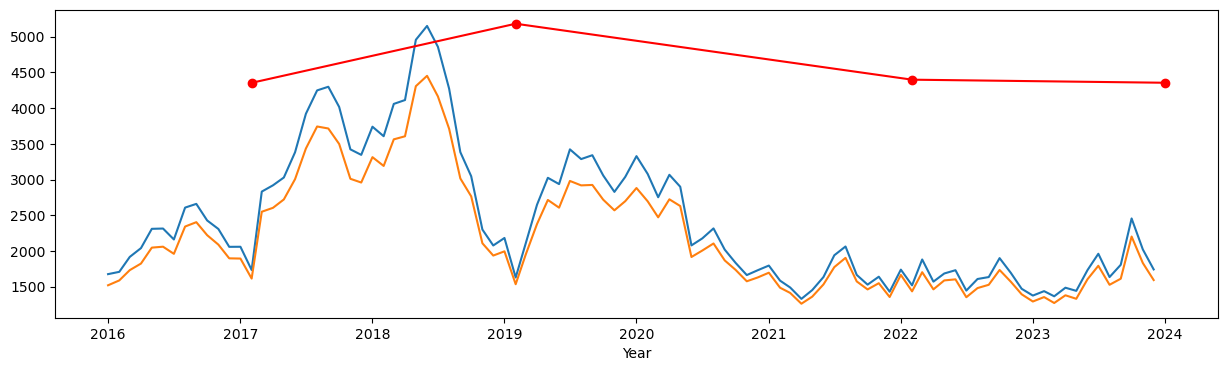

In [447]:
# Time trend plots
plt.figure(figsize=(15, 4))
plt.plot(df_trend['timestamp'], df_trend['ground_truth'], label='Number of Tents')
plt.plot(df_trend['timestamp'], df_trend['ground_truth_bin'], label='days with Tents')
plt.plot(df_pit['year'], df_pit['unsheltered'], 'ro-', label='PIT Count')
plt.xlabel('Year')
plt.show()

In [450]:
# Create a daily trend data frame
df_trend_day = df_combined_grp.copy()

# Create a timestamp using year, month, and day
df_trend_day['timestamp'] = pd.to_datetime(df_trend_day[['year', 'month', 'day']])

# Group by timestamp
df_trend_day = df_trend_day.groupby('timestamp').sum().reset_index()

In [452]:
df_trend_day = df_trend_day[['timestamp','ground_truth']]

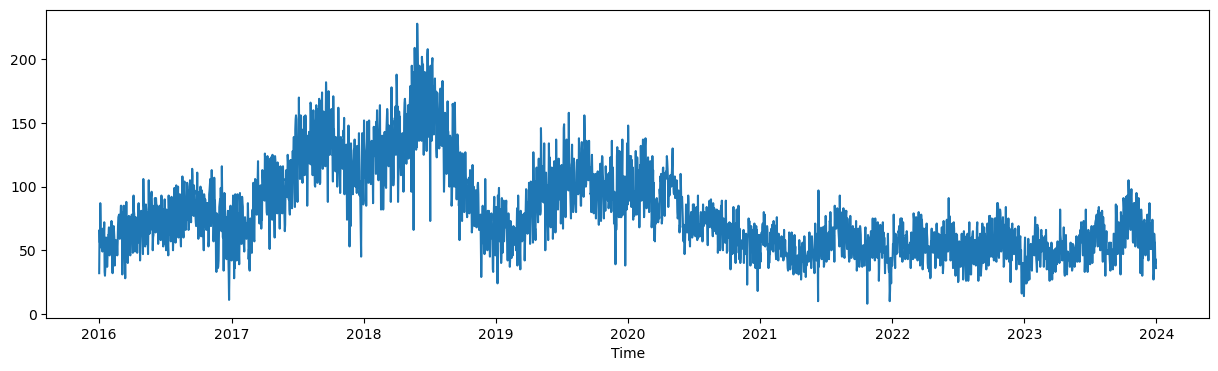

In [454]:
# Time trend plots
plt.figure(figsize=(15, 4))
plt.plot(df_trend_day['timestamp'], df_trend_day['ground_truth'], label='Number of Tents')
#plt.plot(df_pit['year'], df_pit['unsheltered'], 'ro-', label='PIT Count')
plt.xlabel('Time')
plt.show()

/var/folders/y6/z9h695vx2w3gbjh7z32h4j9m0000gn/T/ipykernel_1863/3584481270.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.
  ax2.plot(df_pit['year'], df_pit['unsheltered'], 'ro-', label='PIT Counts', color='r')


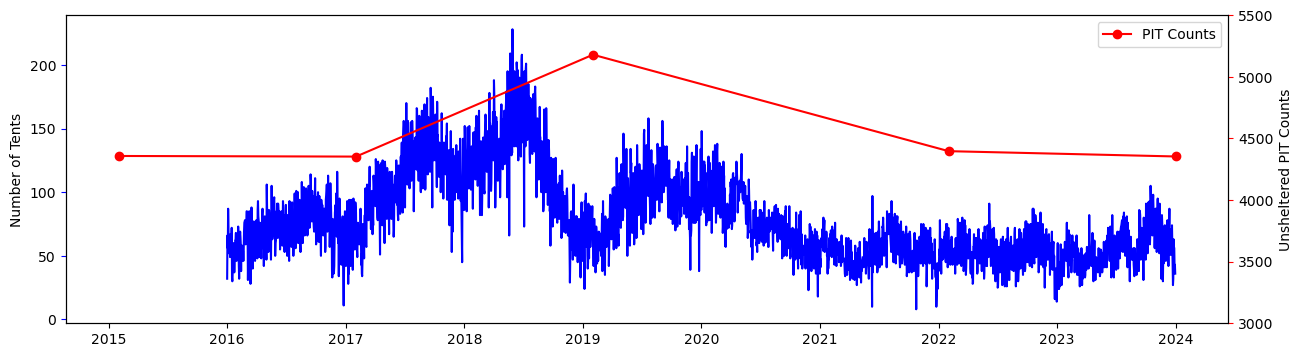

In [465]:
fig, ax1 = plt.subplots(figsize=(15, 4))
ax1.plot(df_trend_day['timestamp'], df_trend_day['ground_truth'], label='Number of Tents', color='b')
ax1.set_ylabel('Number of Tents')
ax1.tick_params('y', color='b')
ax2 = ax1.twinx()
ax2.plot(df_pit['year'], df_pit['unsheltered'], 'ro-', label='PIT Counts', color='r')
ax2.tick_params('y', color='r')
ax2.set_ylabel('Unsheltered PIT Counts')
plt.ylim([3000, 5500])
plt.legend()
plt.show()

In [468]:
df_combined2.head()

timestamp      bboxid   latitude   longitude  ground_truth  \
0 0  2016-11-09 14:15:57  bbox_10_14  37.720555 -122.484861           0.0   
1 4  2016-11-10 16:18:45  bbox_10_14  37.720551 -122.484866           0.0   
  7  2016-11-10 16:19:38  bbox_10_14  37.719184 -122.484775           0.0   
  10 2016-11-10 16:22:08  bbox_10_14  37.719855 -122.484464           0.0   
2 19 2023-11-03 17:59:05  bbox_10_14  37.720383 -122.484852           1.0   

            category     source  \
0 0   Homeless Tents  Mapillary   
1 4   Homeless Tents  Mapillary   
  7   Homeless Tents  Mapillary   
  10  Homeless Tents  Mapillary   
2 19     Encampments        311   

                                          geometry_bbox  year  month  day  
0 0   POLYGON ((-122.4862707014277 37.71914041535512...  2016     11    9  
1 4   POLYGON ((-122.4862707014277 37.71914041535512...  2016     11   10  
  7   POLYGON ((-122.4862707014277 37.71914041535512...  2016     11   10  
  10  POLYGON ((-122.4862707014277 37.71914041535512...  2016     11   10  
2 19  POLYGON ((-122.4862707014277 37.71914041535512...  2023     11    3

In [469]:
df_combined_grp.head()

,bboxid,year,month,day,ground_truth,timestamp
0,bbox_10_14,2016,11,9,0.0,2016-11-09
1,bbox_10_14,2016,11,10,0.0,2016-11-10
2,bbox_10_14,2023,11,3,1.0,2023-11-03
3,bbox_10_15,2016,11,10,0.0,2016-11-10
4,bbox_10_16,2016,11,9,0.0,2016-11-09


In [473]:
df_combined_month.shape

(423744, 6)

In [471]:
df_combined_month.head(20)

,timestamp,bboxid,year,month,ground_truth,ground_truth_bin
0,2016-01-01,bbox_10_14,2016,1,NaN,NaN
1,2016-02-01,bbox_10_14,2016,2,NaN,NaN
2,2016-03-01,bbox_10_14,2016,3,NaN,NaN
3,2016-04-01,bbox_10_14,2016,4,NaN,NaN
4,2016-05-01,bbox_10_14,2016,5,NaN,NaN
5,2016-06-01,bbox_10_14,2016,6,NaN,NaN
6,2016-07-01,bbox_10_14,2016,7,NaN,NaN
7,2016-08-01,bbox_10_14,2016,8,NaN,NaN
8,2016-09-01,bbox_10_14,2016,9,NaN,NaN
9,2016-10-01,bbox_10_14,2016,10,NaN,NaN


In [472]:
df_combined.shape

(344940, 11)

## Sparse Variational Gaussian Processes (SVGPs)

In [142]:
type(df_311_mapi)

geopandas.geodataframe.GeoDataFrame

In [144]:
type(df_geo_bbox)

geopandas.geodataframe.GeoDataFrame

In [145]:
df_311_mapi.head(3)

,timestamp,category,Point,latitude,longitude,ground_truth,source,geometry,geometry_bbox,bboxid
0,2016-01-01 12:31:03,Encampments,"(37.74176025, -122.42236328)",37.741760,-122.422363,1,311,POINT (-122.42236 37.74176),POLYGON ((-122.4240184421711 37.74061071995028...,bbox_25_48
1,2016-01-01 14:25:25,Encampments,"(37.78783387, -122.39168426)",37.787834,-122.391684,1,311,POINT (-122.39168 37.78783),POLYGON ((-122.3925883448746 37.78686969597758...,bbox_57_65
2,2016-01-01 17:29:12,Homeless Concerns,"(37.76065501, -122.41327856)",37.760655,-122.413279,1,311,POINT (-122.41328 37.76066),"POLYGON ((-122.4147373862871 37.7594218699682,...",bbox_38_53


In [147]:
df_geo_bbox_temp.head(3)

,bboxid,geometry_bbox
0,bbox_10_14,POLYGON ((-122.4862707014277 37.71914041535512...
1,bbox_10_15,POLYGON ((-122.4844446961059 37.71913244432333...
2,bbox_10_16,POLYGON ((-122.4826186915052 37.71912444501167...


In [165]:
# Convert df_geo_bbox_temp to GeoDataFrame
df_geo_bbox_temp = gpd.GeoDataFrame(df_geo_bbox_temp, geometry=df_geo_bbox_temp['geometry_bbox'], crs=4326)

# Convert df_311_mapi to GeoDataFrame
df_311_mapi = gpd.GeoDataFrame(df_311_mapi, geometry=gpd.points_from_xy(df_311_mapi.longitude, df_311_mapi.latitude), crs=4326)

In [466]:
print(df_geo_bbox_temp.shape)
print(df_311_mapi.shape)

(4156, 2)
(249675, 7)


In [168]:
df_311_mapi.head(3)

,timestamp,category,Point,latitude,longitude,ground_truth,source,geometry,geometry_bbox,bboxid
0,2016-01-01 12:31:03,Encampments,"(37.74176025, -122.42236328)",37.741760,-122.422363,1,311,POINT (-122.42236 37.74176),POLYGON ((-122.4240184421711 37.74061071995028...,bbox_25_48
1,2016-01-01 14:25:25,Encampments,"(37.78783387, -122.39168426)",37.787834,-122.391684,1,311,POINT (-122.39168 37.78783),POLYGON ((-122.3925883448746 37.78686969597758...,bbox_57_65
2,2016-01-01 17:29:12,Homeless Concerns,"(37.76065501, -122.41327856)",37.760655,-122.413279,1,311,POINT (-122.41328 37.76066),"POLYGON ((-122.4147373862871 37.7594218699682,...",bbox_38_53


In [170]:
df_geo_bbox_temp.head(3)

,bboxid,geometry_bbox,geometry
0,bbox_10_14,POLYGON ((-122.4862707014277 37.71914041535512...,"POLYGON ((-122.48627 37.71914, -122.48443 37.7..."
1,bbox_10_15,POLYGON ((-122.4844446961059 37.71913244432333...,"POLYGON ((-122.48444 37.71913, -122.48261 37.7..."
2,bbox_10_16,POLYGON ((-122.4826186915052 37.71912444501167...,"POLYGON ((-122.48262 37.71912, -122.48078 37.7..."


In [169]:
df_test[['geometry_bbox_left','geometry_bbox_right']]

,geometry_bbox_left,geometry_bbox_right
0,POLYGON ((-122.4240184421711 37.74061071995028...,POLYGON ((-122.4240184421711 37.74061071995028...
1,POLYGON ((-122.3925883448746 37.78686969597758...,POLYGON ((-122.3925883448746 37.78686969597758...
2,"POLYGON ((-122.4147373862871 37.7594218699682,...","POLYGON ((-122.4147373862871 37.7594218699682,..."
3,POLYGON ((-122.4183231796997 37.76814277381044...,POLYGON ((-122.4183231796997 37.76814277381044...
4,POLYGON ((-122.4236696377114 37.78557531065928...,POLYGON ((-122.4236696377114 37.78557531065928...
...,...,...
249670,None,POLYGON ((-122.4019135552491 37.76370906137726...
249671,None,POLYGON ((-122.4952038216226 37.74818974695868...
249672,None,POLYGON ((-122.4351868813149 37.71310459620715...
249673,None,POLYGON ((-122.4055677062686 37.76372755004274...


In [163]:
df_test[df_test['geometry_bbox_right'].isnull()]

,timestamp,category,Point,latitude,longitude,ground_truth,source,geometry,geometry_bbox_left,bboxid_left,index_right,bboxid_right,geometry_bbox_right
36,2016-01-02 11:32:48,Encampments,"(37.78783798, -122.42156219)",37.787838,-122.421562,1,311,POINT (-122.42156 37.78784),None,None,NaN,NaN,NaN
61,2016-01-02 17:25:53,Encampments,"(37.77385484, -122.41455612)",37.773855,-122.414556,1,311,POINT (-122.41456 37.77385),None,None,NaN,NaN,NaN
97,2016-01-03 13:12:41,Homeless Concerns,"(37.78565822, -122.41418757)",37.785658,-122.414188,1,311,POINT (-122.41419 37.78566),None,None,NaN,NaN,NaN
112,2016-01-03 14:49:53,Homeless Concerns,"(37.776816, -122.41271)",37.776816,-122.412710,1,311,POINT (-122.41271 37.77682),None,None,NaN,NaN,NaN
121,2016-01-03 15:16:40,Encampments,"(37.79456022, -122.41310975)",37.794560,-122.413110,1,311,POINT (-122.41311 37.79456),None,None,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249625,2023-12-30 15:50:00,Encampments,"(37.783556, -122.420865)",37.783556,-122.420865,1,311,POINT (-122.42087 37.78356),None,None,NaN,NaN,NaN
249631,2023-12-30 09:30:00,Encampments,"(37.78359195, -122.41907517)",37.783592,-122.419075,1,311,POINT (-122.41908 37.78359),None,None,NaN,NaN,NaN
249643,2023-12-31 17:10:00,Encampments,"(37.7733933, -122.4435389)",37.773393,-122.443539,1,311,POINT (-122.44354 37.77339),None,None,NaN,NaN,NaN
249665,2023-12-31 16:46:00,Encampments,"(37.78537288, -122.4146371)",37.785373,-122.414637,1,311,POINT (-122.41464 37.78537),None,None,NaN,NaN,NaN


In [157]:
df_311_mapi.head(3)

,timestamp,category,Point,latitude,longitude,ground_truth,source,geometry,geometry_bbox,bboxid
0,2016-01-01 12:31:03,Encampments,"(37.74176025, -122.42236328)",37.741760,-122.422363,1,311,POINT (-122.42236 37.74176),POLYGON ((-122.4240184421711 37.74061071995028...,bbox_25_48
1,2016-01-01 14:25:25,Encampments,"(37.78783387, -122.39168426)",37.787834,-122.391684,1,311,POINT (-122.39168 37.78783),POLYGON ((-122.3925883448746 37.78686969597758...,bbox_57_65
2,2016-01-01 17:29:12,Homeless Concerns,"(37.76065501, -122.41327856)",37.760655,-122.413279,1,311,POINT (-122.41328 37.76066),"POLYGON ((-122.4147373862871 37.7594218699682,...",bbox_38_53


In [164]:
df_311_mapi['latitude'][1]

37.78783387

In [159]:
print(df_311_mapi.shape)
print(df_geo_bbox_temp.shape)

(249675, 10)
(4156, 3)


In [158]:
df_geo_bbox_temp.head(3)

,bboxid,geometry_bbox,geometry
0,bbox_10_14,POLYGON ((-122.4862707014277 37.71914041535512...,"POLYGON ((-122.48627 37.71914, -122.48443 37.7..."
1,bbox_10_15,POLYGON ((-122.4844446961059 37.71913244432333...,"POLYGON ((-122.48444 37.71913, -122.48261 37.7..."
2,bbox_10_16,POLYGON ((-122.4826186915052 37.71912444501167...,"POLYGON ((-122.48262 37.71912, -122.48078 37.7..."


In [160]:
type(df_geo_bbox_temp)

geopandas.geodataframe.GeoDataFrame

In [52]:
# # Save the main data frame
# df_combined.to_csv('data/df_combined.csv', index=False)

In [54]:
# Load San Francisco Census Block Group shapefile
data_path = '/Users/wooyongjung/WJ_Projects/HomelessStudy_SanFrancisco_2024/data/tl_2021_06_bg/tl_2021_06_bg.shp'
census_bg = gpd.read_file(data_path)
census_bg = census_bg.to_crs(crs=4326)
census_bg = census_bg[census_bg['GEOID'].str.startswith('06075')]
census_bg = census_bg[['GEOID', 'geometry']]

# Load San Francisco Census Block Group shapefile
df_bg = df[['geoid']]

# Drop duplicates
df_bg = df_bg.drop_duplicates(subset=['geoid'], keep='first')

# Add 0 to the beginning of GEOID
df_bg['geoid'] = df_bg['geoid'].astype(str)
df_bg['geoid'] = df_bg['geoid'].apply(lambda x: x.zfill(12))

# Merge df_bg and census_bg
df_bg = pd.merge(df_bg, census_bg, left_on='geoid', right_on='GEOID', how='left')

# Convert df_bg to GeoDataFrame
df_bg = gpd.GeoDataFrame(df_bg, crs=4326)


In [55]:
df_combined

,timestamp,latitude,longitude,ground_truth,category,source,geometry
0,2016-01-01 01:29:52,37.765645,-122.416334,1.0,Encampments,311,POINT (-122.41633 37.76565)
1,2016-01-01 02:29:32,37.758794,-122.428535,0.0,Homeless Tents,Mapillary,POINT (-122.42853 37.75879)
2,2016-01-01 08:42:49,37.775505,-122.413570,1.0,Encampments,311,POINT (-122.41357 37.77550)
3,2016-01-01 09:36:50,37.787531,-122.394309,1.0,Homeless Concerns,311,POINT (-122.39431 37.78753)
4,2016-01-01 09:39:51,37.761330,-122.434860,1.0,Homeless Concerns,311,POINT (-122.43486 37.76133)
...,...,...,...,...,...,...,...
364528,2023-12-31 20:33:00,37.748303,-122.418045,1.0,Encampments,311,POINT (-122.41805 37.74830)
364529,2023-12-31 20:55:00,37.785275,-122.393996,1.0,Encampments,311,POINT (-122.39400 37.78527)
364530,2023-12-31 21:28:00,37.780657,-122.419766,1.0,Encampments,311,POINT (-122.41977 37.78066)
364531,2023-12-31 22:00:00,37.775620,-122.440506,1.0,Encampments,311,POINT (-122.44051 37.77562)


In [56]:
df_combined['ground_truth'].value_counts()

ground_truth
1.0    251465
0.0    113068
Name: count, dtype: int64